In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K

In [4]:
training_path = "/kaggle/input/digit-recognizer/train.csv"
testing_path = "/kaggle/input/digit-recognizer/test.csv"

epoch = 10
batchsize = 64
image_size = 28

In [5]:
data = pd.read_csv(training_path)
data.head()

data_test = pd.read_csv(testing_path)
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = data.loc[:, "label"]
x_train = data.iloc[:, 1:]

x_test = data_test.iloc[:, :]

print("Training set:", x_train.shape)
print("Training set labels:", y_train.shape)

print("Testing set:", x_test.shape)

Training set: (42000, 784)
Training set labels: (42000,)
Testing set: (28000, 784)


In [7]:
x_train = x_train.values.reshape(-1, 1, image_size, image_size)
x_test = x_test.values.reshape(-1, 1, image_size, image_size)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [8]:
y_train = keras.utils.to_categorical(y_train)

print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, image_size, image_size), activation='relu', padding='same'))
model1.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 14, 16)         0         
_________________________________________________________________
flatten (Flatten)            (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               57600     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 68,266
Trainable params: 68,266
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
558/558 [==============================] - 5s 4ms/step - loss: 0.7223 - accuracy: 0.7976 - val_loss: 0.1674 - val_accuracy: 0.9492
Epoch 2/5
558/558 [==============================] - 2s 3ms/step - loss: 0.1607 - accuracy: 0.9511 - val_loss: 0.1089 - val_accuracy: 0.9668
Epoch 3/5
558/558 [==============================] - 2s 3ms/step - loss: 0.1108 - accuracy: 0.9663 - val_loss: 0.1069 - val_accuracy: 0.9662
Epoch 4/5
558/558 [==============================] - 2s 3ms/step - loss: 0.0782 - accuracy: 0.9765 - val_loss: 0.0850 - val_accuracy: 0.9752
Epoch 5/5
558/558 [==============================] - 2s 3ms/step - loss: 0.0638 - accuracy: 0.9817 - val_loss: 0.0654 - val_accuracy: 0.9798
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Acc: 0.981680691242218
Val Acc: 0.9798412919044495


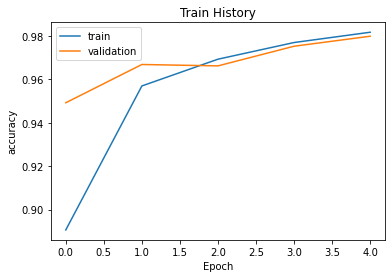

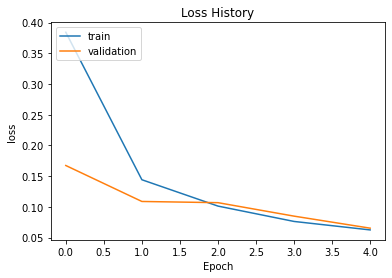

In [10]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model1.fit(x_train, y_train, epochs=epoch, batch_size=batchsize, verbose=1, validation_split=0.15)

print(h.history.keys())
print("Acc:", h.history['accuracy'][-1])
print("Val Acc:", h.history['val_accuracy'][-1])

def show_train_history(train_history, train, validation, title):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title(title)  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

show_train_history(h, 'accuracy', 'val_accuracy', 'Train History') 
show_train_history(h, 'loss', 'val_loss', 'Loss History')  

In [12]:
predictions = model1.predict(x_test)
predictions = np.argmax(predictions,axis=1)

print(predictions[:5])

[2 0 9 9 3]


In [13]:
ids = range(1, (len(predictions)+1))

submission = pd.DataFrame({
    "ImageId": ids, 
    "Label": predictions,
})

submission.to_csv("submission.csv", index = False)